<a href="https://colab.research.google.com/github/HwangHanJae/datascience-learningnote-titanic/blob/main/seaborn_regplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [1]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [2]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###regplot(회귀선+플롯)
- 회귀 모델을 플로팅


####regplot(회귀선+플롯)
 실습에 사용할 데이터
- tips
 - total_bill(float64) : 최종 금액
 - tip(float64) : 팁
 - sex(category) : 성별
 - smoker(category) : 흡연자/비흡연자
 - day(category) : 요일(Sun/Sat/Thur/Fri)
 - time(category) : 시간(Dinner/Lunch)
 - size(int64) : 인원(1~6)
- anscombe
  - x
  - y
  - dataset


####tips

In [3]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [4]:
#데이터 정보
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
#데이터 수치적 요약
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
#데이터 범주적 요약
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


####anscombe

In [ ]:
ana = sns.load_dataset('anscombe')
ana.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
ana.sample(3)

,dataset,x,y
9,I,7.0,4.82
16,II,14.0,8.10
26,III,11.0,7.81


In [ ]:
ana.describe(include=np.number)

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [ ]:
ana.describe(include="object")

,dataset
count,44
unique,4
top,III
freq,11


###그래프 확인

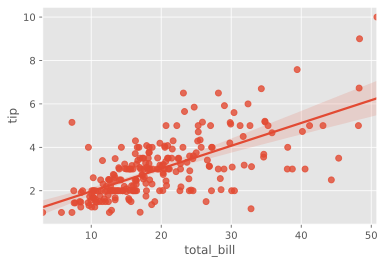

In [7]:
sns.regplot(x='total_bill', y='tip', data=tips)

mean : [4, 6] 
 cov : [(1.5, 0.7), (0.7, 1)]
x : [3.44726746 6.81539447 5.66215268 1.10199747 2.6823407  4.57995181
 5.56867551 4.76124869 3.10266131 4.16132751 2.69450729 4.02721271
 6.09785089 2.90386409 4.08930058 2.42605325 3.88931944 4.29469192
 3.92991213 4.74561006 5.04364401 3.8031927  3.95375021 1.62320471
 7.15063408 6.88738557 4.40653348 1.92083529 5.61028658 3.11610987
 3.11943056 3.0566188  4.19824251 5.03461271 1.20678398 3.32099525
 3.78516436 3.97689828 2.09250164 4.32356516 3.97899144 3.82440539
 3.45967688 3.66860023 4.3762474  3.97336676 6.70686665 0.59122173
 2.88306768 4.30065454 2.88854874 4.27562126 3.64390126 5.78560841
 1.41399578 5.95802375 2.20755534 4.1574671  4.93507683 5.2295702
 6.29102716 1.96006909 4.02779938 4.92678105 5.22293934 5.08695352
 5.27183408 5.29554524 3.85162622 4.302678   3.47879485 1.97402308
 4.65957301 5.26505996 4.87690061 3.90390506 4.82104964 4.97855378
 5.0683593  4.18817473] 
 y : [6.56079547 6.77679417 9.26989578 5.87750555 5.9217

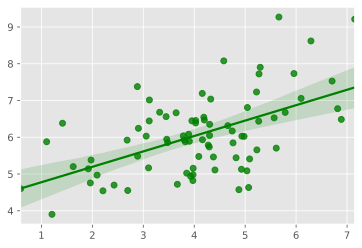

In [14]:
#numpy 배열로 정의된 두개의 변수를 플롯
import numpy as np
np.random.seed(8)

mean, cov = [4, 6], [(1.5, .7),(.7, 1)]
print("mean : {} \n cov : {}".format(mean, cov))
x,  y = np.random.multivariate_normal(mean, cov, 80).T #다변량 정규 분포에서 랜덤 표본을 추출
print("x : {} \n y : {}".format(x, y))

sns.regplot(x=x, y=y,color='g')

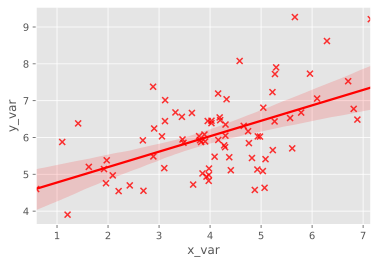

In [19]:
#pandas의 Series로 정의된 두 개의 변수를 플롯

x, y =pd.Series(x, name="x_var",), pd.Series(y, name="y_var")
sns.regplot(x=x,y=y, marker='x', color='r')

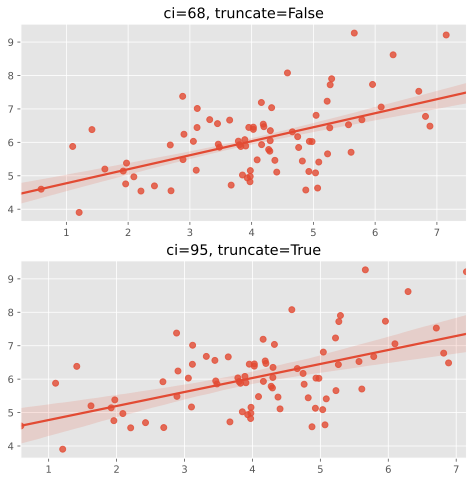

In [27]:
#ci =68, truncate = False 옵션 사용
#신뢰구간 68, 회귀선을 축 한계 까지 확장

f, ax= plt.subplots(2,1, figsize=(8,8))
sns.regplot(x=x,y=y, ci=68, truncate=False, ax=ax[0])
ax[0].set_title("ci=68, truncate=False")
sns.regplot(x=x,y=y, ci=95, truncate=True, ax=ax[1])
ax[1].set_title("ci=95, truncate=True")

for i in range(2):
  ax[i].set_xlabel('')
  ax[i].set_ylabel('')

plt.show()

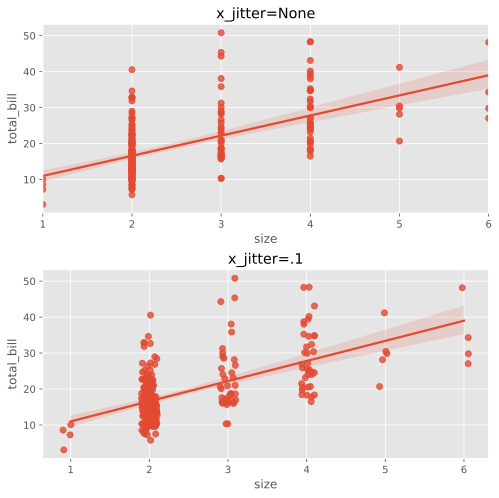

In [30]:
#이산 x 변수로 플로팅 jitter=.1 옵션 사용

f, ax = plt.subplots(2,1,figsize=(8,8))

sns.regplot(x='size', y='total_bill', data=tips, ax=ax[0],x_jitter=None)
ax[0].set_title("x_jitter=None")
sns.regplot(x='size', y='total_bill', data=tips, ax=ax[1], x_jitter=.1)
ax[1].set_title("x_jitter=.1")

plt.subplots_adjust(hspace=.3)
plt.show()

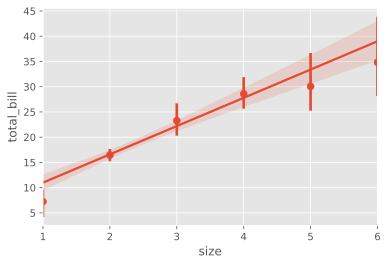

In [31]:
#unique 값에 대한 평균, 신뢰구간을 표시


sns.regplot(x='size', y='total_bill', data=tips, x_estimator=np.mean)

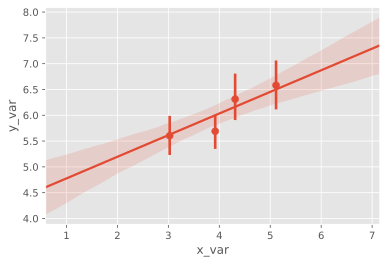

In [32]:
#연속 변수를 불연속 빈으로 나눈 플롯
sns.regplot(x=x, y=y, x_bins=4)

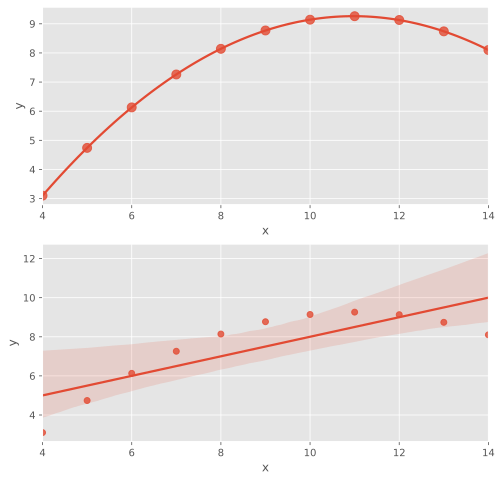

In [62]:
f, ax = plt.subplots(2,1,figsize=(8,8))

#scatter_kws={"s" : 80 } 스캐터의 사이즈 변경
#order 옵션이 1 보다 크면 numpy.polyfit을 사용하여 다항 회귀를 추정
sns.regplot(x="x", y='y', data =ana.loc[ana['dataset'] =="II"],ax=ax[0], scatter_kws={'s':80}, order=2, ci = None)
sns.regplot(x="x", y='y', data =ana.loc[ana['dataset'] =="II"],ax=ax[1])

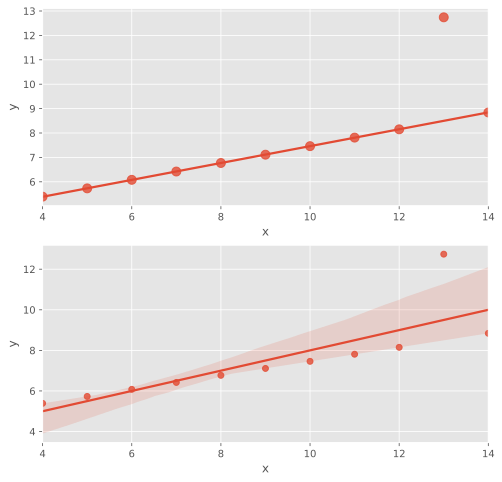

In [68]:
#rubst 회귀를 맞추고 신뢰구간을 플로팅 하지 않음
f, ax = plt.subplots(2,1, figsize=(8,8))

sns.regplot(x='x', y='y', data=ana.loc[ana['dataset'] == 'III'], ax=ax[0], scatter_kws={'s' : 80}, robust=True, ci= None)
sns.regplot(x='x', y='y', data=ana.loc[ana['dataset'] == "III"], ax=ax[1])

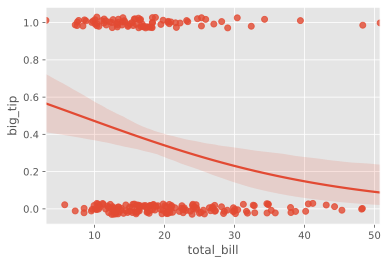

In [70]:
#로지스틱 회귀를 적합하고, y 변수를 jitter 하며, 더 적은 부트 스트랩을 반복

tips["big_tip"] = (tips.tip / tips.total_bill) > .175
sns.regplot(x='total_bill', y='big_tip', data=tips, logistic=True, n_boot = 500, y_jitter=.03)

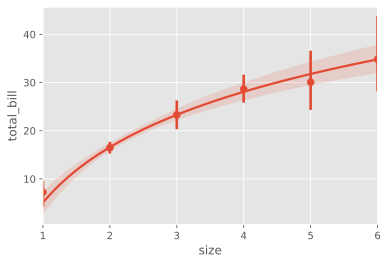

In [71]:
#log(x)를 사용하여 회귀 모델 피팅

sns.regplot(x='size', y='total_bill', data=tips, x_estimator=np.mean, logx=True)